In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector

In [3]:
df = pd.read_csv('loan_data.csv');

In [4]:
mapping = {'High School': 0, 'Associate': 1, 'Bachelor': 2, 'Master': 3, 'Doctorate': 4}
df['person_education'] = [mapping[level] for level in df.loc[:, 'person_education']]

In [5]:
df = pd.get_dummies(df, dtype=int).drop(columns=['person_gender_female', 'previous_loan_defaults_on_file_No']);
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   person_age                          45000 non-null  float64
 1   person_education                    45000 non-null  int64  
 2   person_income                       45000 non-null  float64
 3   person_emp_exp                      45000 non-null  int64  
 4   loan_amnt                           45000 non-null  float64
 5   loan_int_rate                       45000 non-null  float64
 6   loan_percent_income                 45000 non-null  float64
 7   cb_person_cred_hist_length          45000 non-null  float64
 8   credit_score                        45000 non-null  int64  
 9   loan_status                         45000 non-null  int64  
 10  person_gender_male                  45000 non-null  int64  
 11  person_home_ownership_MORTGAGE      45000

In [6]:
corrs = df.corr()['loan_status']
corrs

person_age                           -0.021476
person_education                     -0.001108
person_income                        -0.135808
person_emp_exp                       -0.020481
loan_amnt                             0.107714
loan_int_rate                         0.332005
loan_percent_income                   0.384880
cb_person_cred_hist_length           -0.014851
credit_score                         -0.007647
loan_status                           1.000000
person_gender_male                   -0.000561
person_home_ownership_MORTGAGE       -0.213451
person_home_ownership_OTHER           0.013645
person_home_ownership_OWN            -0.093666
person_home_ownership_RENT            0.255239
loan_intent_DEBTCONSOLIDATION         0.084130
loan_intent_EDUCATION                -0.064006
loan_intent_HOMEIMPROVEMENT           0.033838
loan_intent_MEDICAL                   0.065195
loan_intent_PERSONAL                 -0.022488
loan_intent_VENTURE                  -0.085992
previous_loan

In [7]:
Y = df[['loan_status']];
X = df.drop(columns=['loan_status']);

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

model = LogisticRegression()
rfecv = RFECV(estimator=model, step=1, scoring='accuracy', cv=5)
rfecv.fit(X_train, y_train)

print("Optimal number of features:", rfecv.n_features_)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-

Optimal number of features: 13


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
model = LogisticRegression()

# Forward selection
sfs = SequentialFeatureSelector(model, n_features_to_select=13, direction='forward', scoring='accuracy')
sfs.fit(X_train, y_train)

# Get selected features
selected_features = sfs.get_support()
print("Selected feature indices:", selected_features.nonzero()[0])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/uti

Selected feature indices: [ 2  4  5  6  9 11 12 13 14 16 17 18 20]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs f

In [10]:
X_fwd_select = X.iloc[:, selected_features.nonzero()[0]]
scaler = StandardScaler()
X_fwd_select = pd.DataFrame(scaler.fit_transform(X_fwd_select))

Y['loan_status'] = Y['loan_status'].replace(0, -1)

/var/folders/pp/tkpkm60n7_v1l91_t8229jym0000gn/T/ipykernel_64571/3520950207.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['loan_status'] = Y['loan_status'].replace(0, -1)


In [11]:
fwd_df = pd.concat([Y,X_fwd_select],axis=1)
fwd_train, fwd_test = train_test_split(fwd_df, train_size=0.8, random_state=24)

fwd_train.to_csv('fwd_train.csv', index=False)
fwd_test.to_csv('fwd_test.csv', index=False)

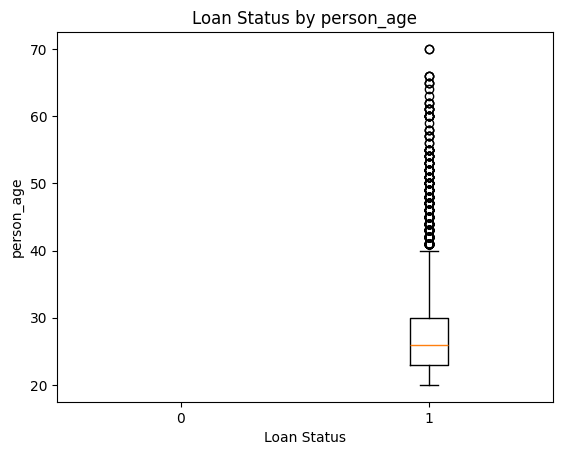

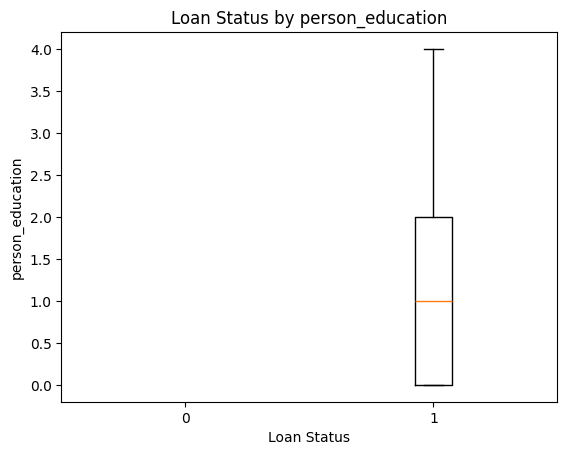

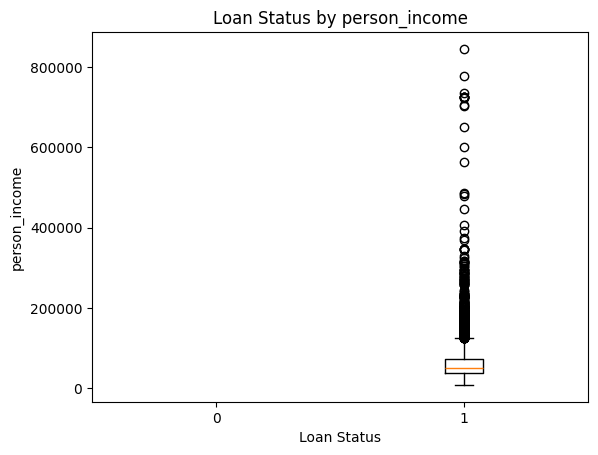

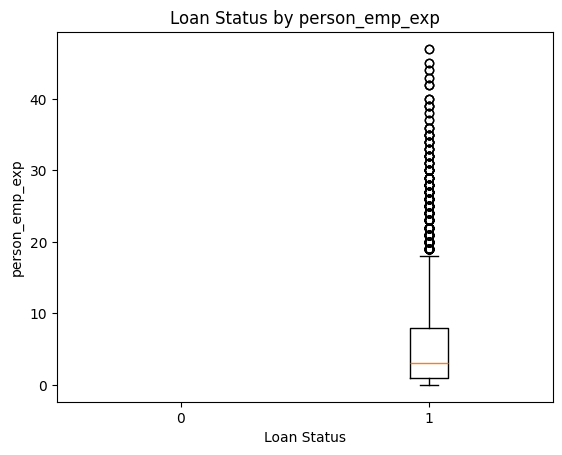

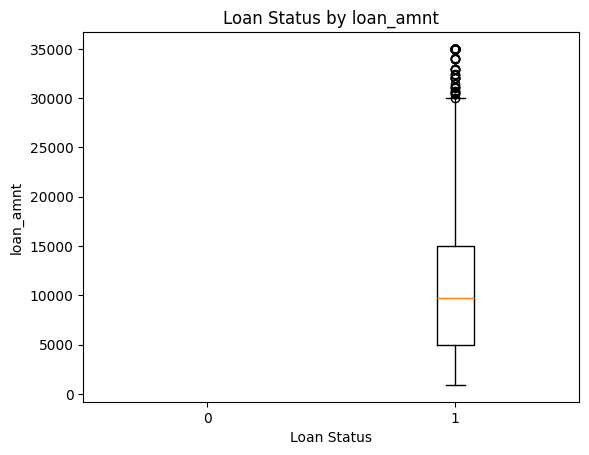

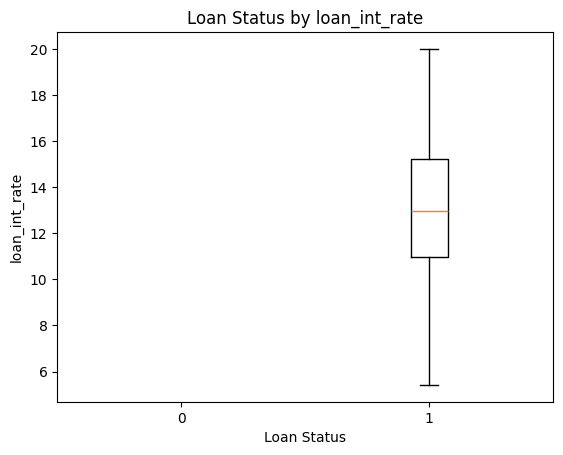

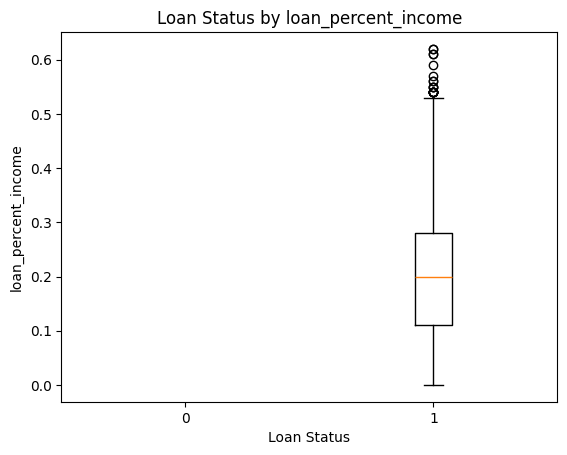

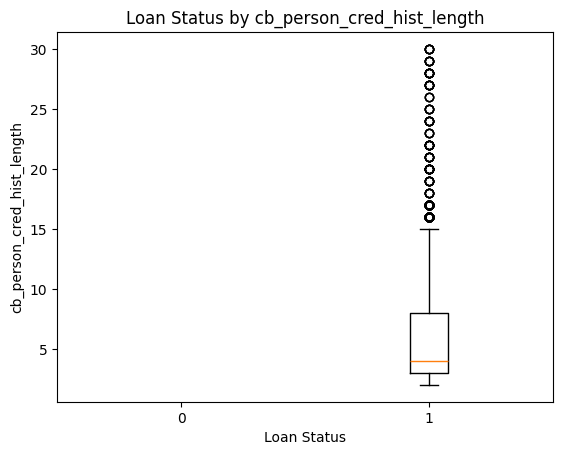

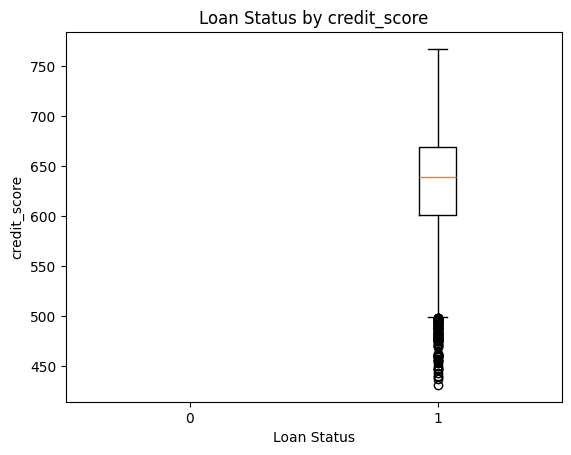

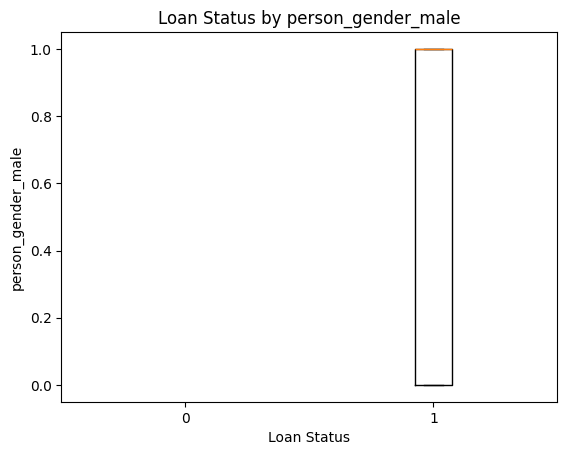

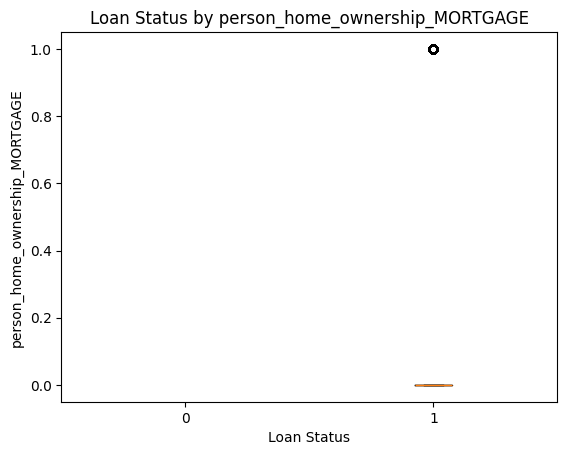

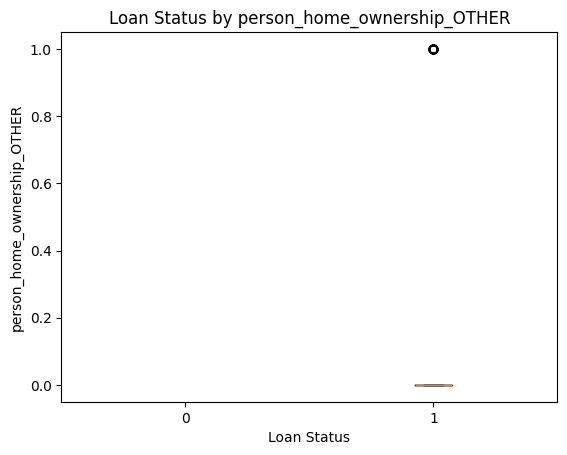

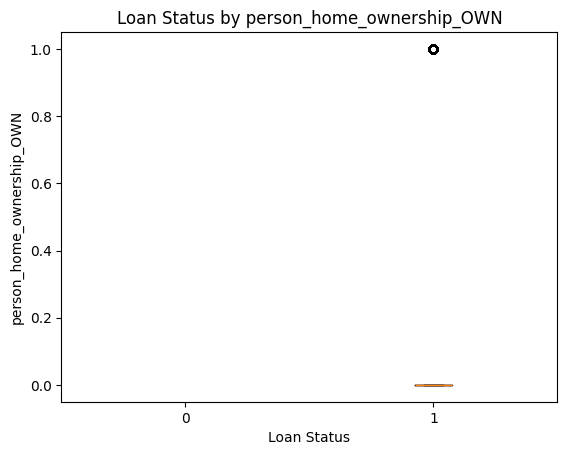

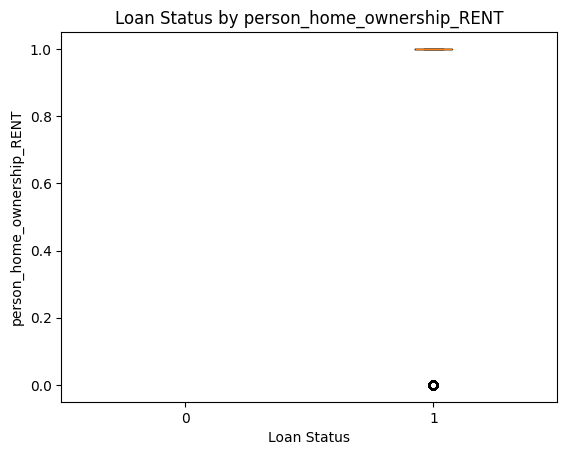

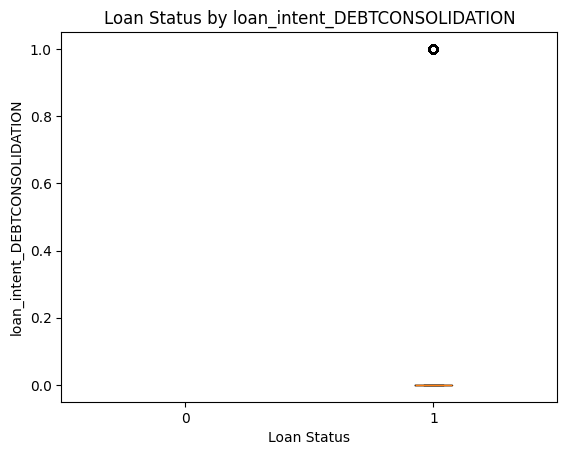

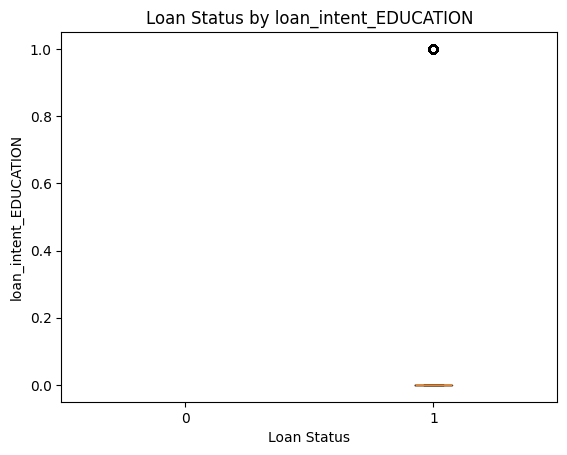

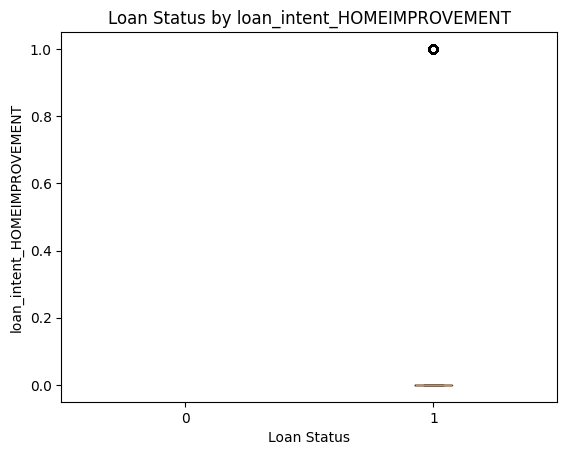

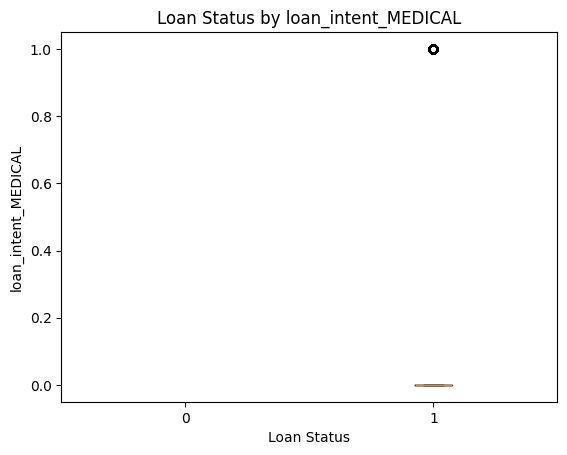

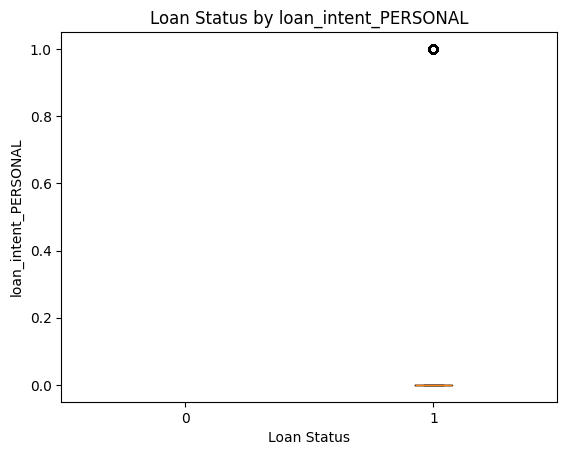

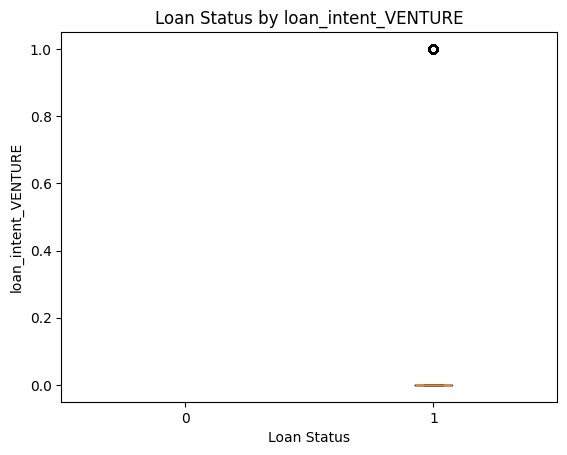

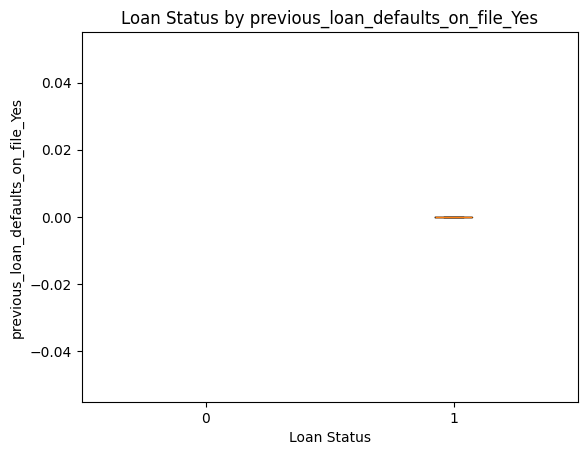

In [12]:
for col in X.columns:
    split = [X[col][Y.squeeze() == 0], X[col][Y.squeeze() == 1]]
    plt.boxplot(split, labels=[0,1]);
    plt.xlabel('Loan Status');
    plt.ylabel(col);
    plt.title("Loan Status by " + col);
    plt.show();

In [13]:
for col in X.columns:
    print(pd.crosstab(X[col], Y['loan_status'], normalize='columns'))

loan_status        -1       1
person_age                   
20.0         0.000429  0.0002
21.0         0.025543  0.0395
22.0         0.091029  0.1050
23.0         0.116429  0.1179
24.0         0.114571  0.1128
25.0         0.099400  0.1028
26.0         0.082171  0.0783
27.0         0.069486  0.0663
28.0         0.060886  0.0597
29.0         0.055000  0.0530
30.0         0.045571  0.0426
31.0         0.036943  0.0352
32.0         0.032114  0.0279
33.0         0.028171  0.0254
34.0         0.022257  0.0201
35.0         0.018686  0.0193
36.0         0.016600  0.0159
37.0         0.015086  0.0138
38.0         0.011886  0.0087
39.0         0.008571  0.0089
40.0         0.007914  0.0072
41.0         0.007114  0.0054
42.0         0.005286  0.0062
43.0         0.005029  0.0039
44.0         0.004086  0.0034
45.0         0.002886  0.0034
46.0         0.002800  0.0016
47.0         0.002600  0.0021
48.0         0.001943  0.0025
49.0         0.001257  0.0015
50.0         0.001257  0.0012
51.0      

In [14]:
X = X.drop(columns=['loan_intent_PERSONAL', 'loan_intent_HOMEIMPROVEMENT', 'person_home_ownership_OTHER', 'person_gender_male', 'person_education', 'cb_person_cred_hist_length'])

In [18]:
Y['loan_status'] = Y['loan_status'].replace(0, -1)

/var/folders/pp/tkpkm60n7_v1l91_t8229jym0000gn/T/ipykernel_64571/3890541013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['loan_status'] = Y['loan_status'].replace(0, -1)


In [18]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))

In [19]:
df = pd.concat([Y,X],axis=1)
train, test = train_test_split(df, train_size=0.8, random_state=24)

In [ ]:
train.to_csv('loan_data_train.csv', index=False)
test.to_csv('loan_data_test.csv', index=False)